<div align="center">

  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://colab.research.google.com/github/ultralytics/notebooks/blob/main/notebooks/how-to-train-ultralytics-yolo-on-construction-ppe-detection-dataset.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
  
  Welcome to the Construction-PPE detection notebook using Ultralytics YOLO11 🚀! <a href="https://github.com/ultralytics/ultralytics">YOLO11</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. We hope the resources in this notebook help you get the most out of YOLO11. Please see the YOLO11 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussion.</div>

# Construction PPE Detection using Ultralytics YOLO11

This notebook serves as an initial step for training the YOLO11 model on the [construction-ppe](https://docs.ultralytics.com/datasets/detect/construction-ppe/) detection dataset.

## Dataset Structure

The construction-ppe dataset is divided into three subsets:

- **Training set**: Consisting of 1132 images, each accompanied by corresponding annotations.
- **Validation set**: Comprising 143 images, with annotations paired for each one.
- **Testing set**: Comprising 141 images, with annotations paired for each one.

## Applications

Construction-PPE detection using computer vision improves workplace safety and compliance. By analyzing site footage, AI systems check if workers wear helmets, vests, or gloves, enabling real-time monitoring and instant alerts. These systems can also provide safety analytics, support drone or robot inspections, and serve as valuable tools for research and education in workplace safety.

## Setup

Install the `ultralytics` package and dependencies (see the [pyproject.toml](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml)), then verify your software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://clickpy.clickhouse.com/dashboard/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [2]:
!uv pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.236 🚀 Python-3.11.0 torch-2.9.1 CPU (Apple M1 Pro)
Setup complete ✅ (10 CPUs, 32.0 GB RAM, 404.0/460.4 GB disk)


## Dataset YAML File

A YAML (Yet Another Markup Language) file defines the dataset configuration, including paths, classes, and other pertinent details. 😀

```yaml
# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Construction-PPE dataset by Ultralytics
# Documentation: https://docs.ultralytics.com/datasets/detect/construction-ppe/
# Example usage: yolo train data=construction-ppe.yaml
# parent
# ├── ultralytics
# └── datasets
#     └── construction-ppe ← downloads here (178.4 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: construction-ppe # dataset root dir
train: images/train # train images (relative to 'path') 1132 images
val: images/val # val images (relative to 'path') 143 images
test: images/test # test images (relative to 'path') 141 images

# Classes
names:
  0: helmet
  1: gloves
  2: vest
  3: boots
  4: goggles
  5: none
  6: Person
  7: no_helmet
  8: no_goggle
  9: no_gloves
  10: no_boots

# Download script/URL (optional)
download: https://github.com/ultralytics/assets/releases/download/v0.0.0/construction-ppe.zip
```

## Train

Train YOLO11 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLO11 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="construction-ppe.yaml", epochs=5, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.240 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.236 🚀 Python-3.11.0 torch-2.9.1 CPU (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=construction-ppe.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimiz

![Construction-ppe dataset sample image](https://github.com/ultralytics/docs/releases/download/0/construction-ppe-dataset-sample.avif)

## Predict

YOLO11 can be used from the command line with the `yolo` CLI command for various tasks. It supports additional arguments (e.g., imgsz=640). See a full list of available [yolo arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLO11 Predict Docs](https://docs.ultralytics.com/modes/train/).

In [10]:
from ultralytics import YOLO

# Load a model
modelp = YOLO("./runs/detect/train/weights/best.pt")  # load a fine-tuned model

# Inference using the model (img/video/stream)
prediction_results = modelp.predict("./test-helmet-jacket.png", save=True, classes=[0, 2, 4])  # Only detect person, helmet, vest


image 1/1 /Users/tenaity/Documents/YOLO-PPE/test-helmet-jacket.png: 640x640 4 helmets, 4 vests, 55.5ms
Speed: 3.3ms preprocess, 55.5ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /Users/tenaity/Documents/YOLO-PPE/runs/detect/predict2


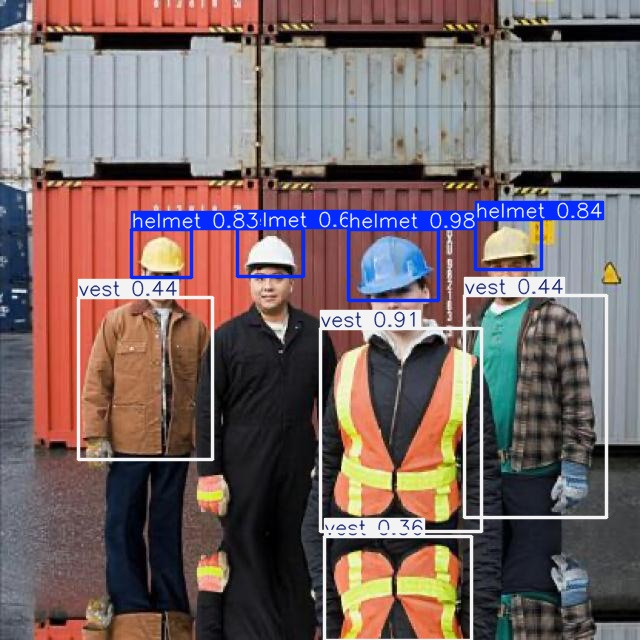

## Export

Export a YOLO11 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLO11 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format                                                                   | `format` Argument | Model                     | Metadata | Arguments                                                            |
|--------------------------------------------------------------------------|-------------------|---------------------------|----------|----------------------------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                          | -                 | `yolo11n.pt`              | ✅        | -                                                                    |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript)     | `torchscript`     | `yolo11n.torchscript`     | ✅        | `imgsz`, `optimize`, `batch`                                         |
| [ONNX](https://docs.ultralytics.com/integrations/onnx)                   | `onnx`            | `yolo11n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`, `batch`             |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino)           | `openvino`        | `yolo11n_openvino_model/` | ✅        | `imgsz`, `half`, `dynamic`, `int8`, `batch`                          |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt)           | `engine`          | `yolo11n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace`, `int8`, `batch` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml)               | `coreml`          | `yolo11n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`, `batch`                              |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model`     | `yolo11n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`, `batch`                                    |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef)     | `pb`              | `yolo11n.pb`              | ❌        | `imgsz`, `batch`                                                     |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite)              | `tflite`          | `yolo11n.tflite`          | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu)        | `edgetpu`         | `yolo11n_edgetpu.tflite`  | ✅        | `imgsz`                                                              |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs)                  | `tfjs`            | `yolo11n_web_model/`      | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle)   | `paddle`          | `yolo11n_paddle_model/`   | ✅        | `imgsz`, `batch`                                                     |
| [MNN](https://docs.ultralytics.com/integrations/mnn)                     | `mnn`             | `yolo11n.mnn`             | ✅        | `imgsz`, `batch`, `int8`, `half`                                     |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn)                   | `ncnn`            | `yolo11n_ncnn_model/`     | ✅        | `imgsz`, `half`, `batch`                                             |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500)          | `imx`             | `yolo11n_imx_model/`      | ✅        | `imgsz`, `int8`                                                      |
| [RKNN](https://docs.ultralytics.com/integrations/rockchip-rknn)          | `rknn`            | `yolo11n_rknn_model/`     | ✅        | `imgsz`, `batch`, `name`                                             |

In [ ]:
from ultralytics import YOLO

# Load a model
modele = YOLO(f"{model.trainer.save_dir}/weights/best.pt")  # load a fine-tuned model

# Export the model
modele.export(format="onnx")

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,584,297 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 15, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 9.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1rc1 opset 22...
ONNX: slimming with onnxslim 0.1.70...
ONNX: export success ✅ 10.6s, saved as '/content/runs/detect/train/weights/best.onnx' (10.1 MB)

Export complete (11.0s)
Results saved to /content/runs/detect/train/weights
Predict:     

'/content/runs/detect/train/weights/best.onnx'

## Citation,License and Attribution

```bibtex
@dataset{Dalvi_Construction_PPE_Dataset_2025,
    author = {Mrunmayee Dalvi and Niyati Singh and Sahil Bhingarde and Ketaki Chalke},
    title = {Construction-PPE: Personal Protective Equipment Detection Dataset},
    month = {January},
    year = {2025},
    version = {1.0.0},
    license = {AGPL-3.0},
    url = {https://docs.ultralytics.com/datasets/detect/construction-ppe/},
    publisher = {Ultralytics}
}
```
